<a href="https://colab.research.google.com/github/minjeong-kim-git/GNUVILL_AI/blob/main/GNUVILL_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%8A%A4%ED%84%B0%EB%94%94(%EC%A4%91%EA%B8%89)_9%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GNUVILL 인공지능 스터디(중급) 9주차 실습: XOR

----
## 0. XOR 연산이란?
 XOR 연산이란 홀수 개의 입력이 참일 때 결과값이 참인 논리 연산입니다. 결과값이 아래 표와 같이 나옵니다!

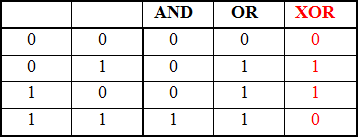

파이썬의 boolean, 논리 연산에서는 참, 거짓을 나타내는 값은 True, False이지만 딥러닝에서의 주요 입력값은 정수(Integer)나 실수(float)입니다.

참과 거짓의 값을 출력하여 확인해볼까요?

# XOR 연산의 네트워크 구성해보기

## 1. Tensorflow, numpy, math import하기


*   **math**: C에서 정의된 수학 함수에 대한 액세스 제공



In [ ]:
import tensorflow as tf
import numpy as np
import math

## 2. sigmoid 함수 정의

sigmoid 함수, 저희 어디에서 봤는지 기억하시나요? 로지스틱 회귀 부분에서 봤습니다! 왜 갑자기 sigmoid 함수가 나오는지를 살펴볼까요?
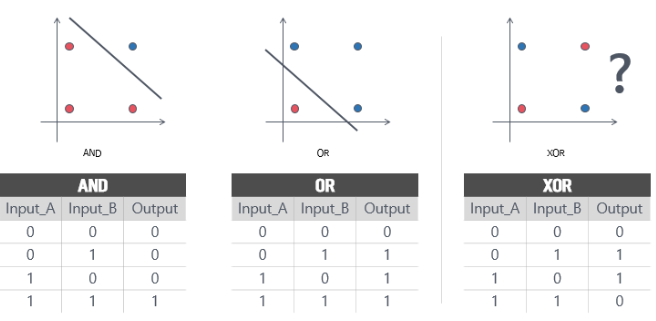



 기존의 퍼셉트론은 XOR과 같은 비선형적인 문제는 해결할 수 없었다고 합니다! 이를 해결하기 위해 나온 개념이 **hidden layer**인데, 이것도 퍼셉트론을 선형분류기에서 비선형분류기로 바꿀 수 있는 것은 아니었다고 합니다.

왜냐하면! 선형 시스템이 아무리 깊어지더라도 **f(ax+by)=af(x) + bf(y)**의 성질 때문에 결국 하나의 layer로 깊은 layer를 구현할 수 있기 때문입니다:D

그래서 활성화 함수가 등장했습니다. 활성화 함수를 사용하면 입력값에 대한 출력값이 선형적으로 나오지 않으므로 선형분류기를 비선형 시스템으로 만들 수 있었다는 거죠! 따라서,



*   **MLP(Multiple layer perceptron/다층 퍼셉트론)**: 활성화 함수를 이용한 비선형 시스템을 여러 층으로 쌓는 것!
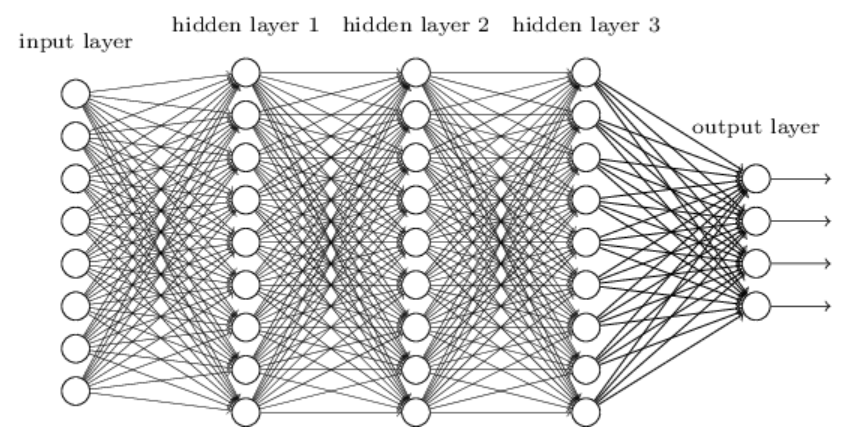
*  활성화 함수의 정류: https://reniew.github.io/12/



그래서 sigmoid 함수는 비선형적인 값을 얻기 위해 쓰일 수 있다! 이렇게 생각해주시면 될 것 같습니다:D!

sigmoid 함수 수식, 다시 보고 갈까요?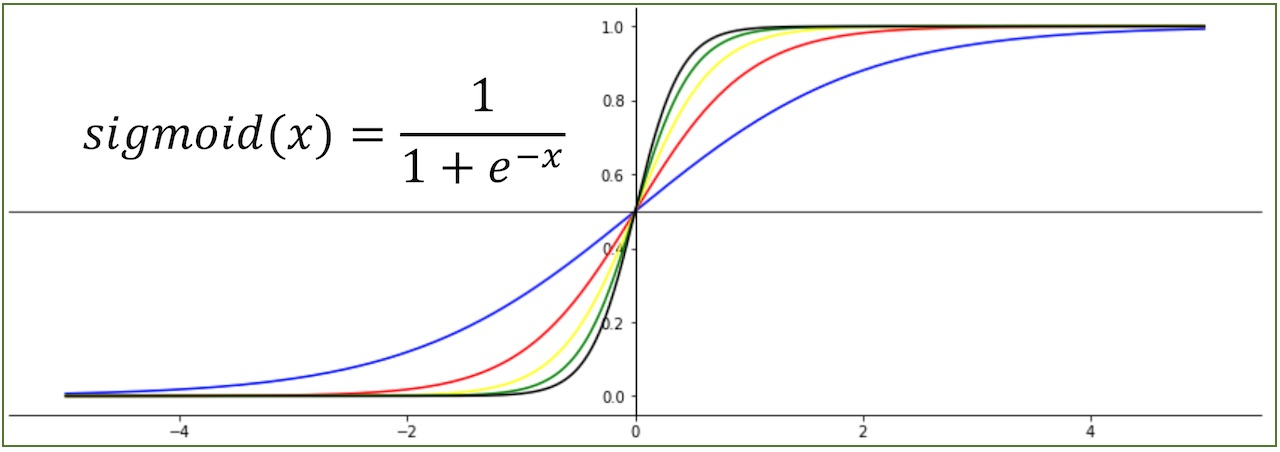



*   **math.exp(x)**: e(자연상수, 2.718281828459045)의 x 제곱



## 3. 데이터 만들기!


In [ ]:
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])

## 4. 정규분포로 난수 생성

*  **tf.random.shape([a], b, c)**: 균일 분포의 난수를 얻는 함수
  *   **[a]**: 결과값의 shape, 행, 열 등 차원의 수
  *   **b**: 최솟값
  *   **c**: 최댓값

  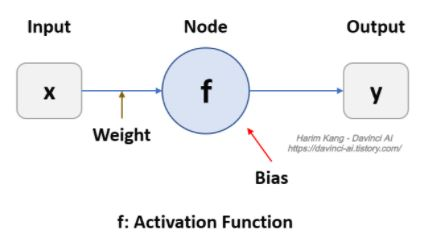

## 5. 경사하강법
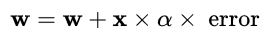


In [ ]:
for i in range(2000): 
  error_sum = 0
  
# 경사하강법 코드 작성
  
  if i % 200 == 199:
    print(i, error_sum)

# 연산이 999 이후로 변하지 않는다!

In [ ]:
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176286712095
X: [1 0] Y: [1] Output: 0.5128176305326305
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.5000000009313226


Y와 output 사이엔 차이가 있는 것 같은데 0.5 근처에서 머무르고 있습니다. 무엇이 문제일까요?

In [ ]:
# w, b 출력하기

w: tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
b: tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32)


 XOR 네트워크의 중간값과 출력값이 어떻게 변하는지 확인하는 코드를 짜봅시다.

In [ ]:
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Cal_mid:', np.sum(x[i]*w)+b,'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Cal_mid: tf.Tensor([0.05128175], shape=(1,), dtype=float32) Output: 0.5128176286712095
X: [1 0] Y: [1] Cal_mid: tf.Tensor([0.05128176], shape=(1,), dtype=float32) Output: 0.5128176305326305
X: [0 1] Y: [1] Cal_mid: tf.Tensor([-3.7252903e-09], shape=(1,), dtype=float32) Output: 0.4999999990686774
X: [0 0] Y: [0] Cal_mid: tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32) Output: 0.5000000009313226


첫번째 입력에 따라, Cal_mid(중간 계산값)은 달라지지만, Output은 큰 변동이 없는 것을 확인할 수 있습니다.

AND 네트워크와 비교해보면 그 차이는 더 명확해집니다.

---
## AND 네트워크 살펴보기

In [ ]:
# AND 네트워크
import tensorflow as tf
import numpy as np

import math
# 시그모이드 함수 정의
def sigmoid(x): 
  return 1 / (1 + math.exp(-x))

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000): 
  error_sum = 0

  for j in range(4): 
    output = sigmoid(np.sum(x[j] * w) + b_x * b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 199:
    print(i, error_sum)

for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Cal_mid:', np.sum(x[i]*w)+b,'Output:', sigmoid(np.sum(x[i]*w)+b))

199 -0.11556720419819157
399 -0.0675187092932057
599 -0.04759708635449651
799 -0.036643749820479514
999 -0.029732420455397954
1199 -0.024984344739968054
1399 -0.021527261249446802
1599 -0.01890121543126577
1799 -0.01683809236617022
1999 -0.015177717724256789
X: [1 1] Y: [1] Cal_mid: tf.Tensor([3.3040113], shape=(1,), dtype=float32) Output: 0.9645661673661137
X: [1 0] Y: [0] Cal_mid: tf.Tensor([-3.659142], shape=(1,), dtype=float32) Output: 0.025107954907718145
X: [0 1] Y: [0] Cal_mid: tf.Tensor([-3.6559806], shape=(1,), dtype=float32) Output: 0.025185455252872538
X: [0 0] Y: [0] Cal_mid: tf.Tensor([-10.619134], shape=(1,), dtype=float32) Output: 2.4443202604516548e-05


In [ ]:
print('w:', w)
print('b:', b)

w: tf.Tensor([6.959992  6.9631534], shape=(2,), dtype=float32)
b: tf.Tensor([-10.619134], shape=(1,), dtype=float32)


XOR 네트워크는 AND 네트워크에 비해 어떤 일을 하려는지 **명확하지 않습니다.**

가중치 w1=5.1281769e-02이 w2=3.7252903e-09에 비해 조금 더 큰 값을 가지지만, 중간값이 이미 0에 가까워지고 따라서 시그모이드 함수를 취한 값은 0.5에 가까워질 뿐입니다.

이부분이 XOR 문제이고, 이를 해결하기 위해 저희는 여러 개의 퍼셉트론을 사용해야 합니다.

## 6. keras model 사용하기


*   **tf.keras.Sequential**: 순차적(sequential)으로 뉴런과 뉴런이 합쳐진 단위인 레이어를 일직선으로 배치한 것
*   **tf.keras.layers.Dense**: 모델에서 사용하는 레이어를 정의하는 명령. 

  가장 기본적인 레이어로써, 레이어의 입력과 출력 사이에 있는 모든 뉴런이 서로 연결되는 레이어


*   **units**: 레이어를 구성하는 뉴런의 수를 정의
*   **input_shape**: 입력의 차원 수를 정의
*   **optimizer**:딥러닝의 학습식을 정의 부분
*   **SGD**: 확률적 경사 하강법
*   **mse**: 평균 제곱 오차(Mean Squared Error)의 약자로 기대 출력에서 실제 출력을 뺀 뒤에 제곱한 값을 평균









In [ ]:
# keras model 코드 작성



*  **batch_size**: 한번에 학습시키는 데이터의 수



In [ ]:
# 모델 학습시키기, x: 입력, y: 기대 출력

In [ ]:
# x에 대해 model의 예측

In [ ]:
for weight in model.weights:
  print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-4.0918527, -4.2424264],
       [ 3.8570778,  4.3718047]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-2.1676385,  2.241305 ], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 5.486149],
       [-5.06776 ]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([2.2592533], dtype=float32)>


In [ ]:
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20], 0, 1)
plt.plot(x, y)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000], 0, 1)
plt.hist(random_normal, bins = 100)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])